In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pandas

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
# Ruta de la carpeta actual en Google Drive
path = '/content/drive/My Drive/Ciencia de Datos/Master ciencia de datos (Big Data & TFM)/TFM - tormentas solares/bases de datos - nuevo'

# Lista los archivos en la carpeta actual
files_in_drive = os.listdir(path)

# Muestra los archivos
print(files_in_drive)

['ACE_SWEPAM_Data_Hour.txt', 'ACE_SWEPAM_Data_daily.txt', 'Copy of TERREMOTOS Y VOLCANES.xlsx', 'webs NUEVOS DATOS.docx', 'ACE_SWEPAM_info_sobre_updates.txt', 'TERREMOTOS.xlsx', 'dataframes_preprocesados', 'preprocesado_terremotos.ipynb', 'terremotos_DBSCAN.ipynb']


In [ ]:
# Ruta al archivo CSV en Google Drive
file_path = path + '/TERREMOTOS.xlsx'

# Carga los datos en un DataFrame
df = pd.read_excel(file_path)

# Muestra las primeras filas del DataFrame
df.head()

,time.1,time.2,latitude,longitude,depth,mag,magType,nst,gap,dmin,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1998-01-23,01:02:56,40.352,29.269,10.0,2.5,md,NaN,NaN,NaN,...,2014-11-07 02:04:22.275,"10 km SE of Umurbey, Turkey",earthquake,NaN,NaN,NaN,NaN,reviewed,isk,isk
1,1998-01-23,02:53:14,51.296,-178.152,33.0,4.9,mb,NaN,NaN,NaN,...,2014-11-07 02:04:22.276,"123 km WSW of Adak, Alaska",earthquake,NaN,NaN,NaN,52.0,reviewed,us,us
2,1998-01-23,02:59:26,-25.072,70.007,10.0,4.1,mb,NaN,NaN,NaN,...,2014-11-07 02:04:22.285,Mid-Indian Ridge,earthquake,NaN,NaN,NaN,1.0,reviewed,us,us
3,1998-01-23,04:51:35,44.344,149.791,33.0,3.7,mb,NaN,NaN,NaN,...,2014-11-07 02:04:22.289,"180 km ESE of Kuril’sk, Russia",earthquake,NaN,NaN,NaN,1.0,reviewed,us,us
4,1998-01-23,05:12:28,14.484,146.986,33.0,4.1,mb,NaN,NaN,NaN,...,2014-11-07 02:04:22.292,"155 km ESE of Saipan, Northern Mariana Islands",earthquake,NaN,NaN,NaN,2.0,reviewed,us,us


Los datos que disponemos son los de todos los eventos sísmicos desde el 23 de enero del 1998 hasta el 30 de septiembre del 2023.

# Breve Inspección del Dataframe

Queremos comprobar la tipología de los datos con los que estamos trabajando y los valores que toman.

In [ ]:
# Mostrar los tipos de columnas y registros

print("Campos:", list(df.columns))
print("\nTipología:\n\n", df.dtypes, "\n")
print("Número de registros:", len(df))

Campos: ['time.1', 'time.2', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst', 'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type', 'horizontalError', 'depthError', 'magError', 'magNst', 'status', 'locationSource', 'magSource']

Tipología:

 time.1             datetime64[ns]
time.2                     object
latitude                  float64
longitude                 float64
depth                     float64
mag                       float64
magType                    object
nst                       float64
gap                       float64
dmin                      float64
rms                       float64
net                        object
id                         object
updated            datetime64[ns]
place                      object
type                       object
horizontalError           float64
depthError                float64
magError                  float64
magNst                    float64
status                     object
locationSource           

In [ ]:
#Comprobamos que los valores de las coordenadas estén dentro de lo esperado

print(max(df['latitude']), min(df['longitude']), "\n", min(df['latitude']), max(df['longitude']))

87.386 -179.9997 
 -84.422 180.0


El dataframe consta de registros de movimientos sísmicos y no todos ellos son terremotos. Esto se refleja en la variable 'type' y nos interesará quedarnos únicamente con los de tipo 'earthquake', que además es con diferencia el tipo de sismo más abundante que hay.

In [ ]:
# Contar la frecuencia de cada valor en la columna "type"
type_counts = df['type'].value_counts()

# Crear un DataFrame con la frecuencia de "type"
df_type_counts = pd.DataFrame({'Sismic Type': type_counts.index, 'count': type_counts.values})

# Mostrar el DataFrame con la frecuencia de "type"
print(df_type_counts)

                   Sismic Type   count
0                   earthquake  657304
1                    explosion    4797
2             mining explosion    2174
3                    ice quake     197
4                   rock burst     136
5                  other event     127
6                 quarry blast      96
7            volcanic eruption      64
8                mine collapse      14
9            nuclear explosion       9
10      experimental explosion       8
11                  sonic boom       6
12                   landslide       2
13  induced or triggered event       1
14                  Rock Slide       1
15                    collapse       1
16              acoustic noise       1
17                   Ice Quake       1


La columna 'status' nos habla de la forma en la que se ha revisado/comprobado la veracidad del terremoto. Nos quedaremos con aquellos registros de tipo 'reviewed', pues son terremotos que han sido revisados y confirmados como tal por un profesional.

In [ ]:
# Contar la frecuencia de cada valor en la columna "status"
status_counts = df['status'].value_counts()

# Crear un DataFrame con la frecuencia de "status"
df_status_counts = pd.DataFrame({'STATUS': status_counts.index, 'count': status_counts.values})

# Mostrar el DataFrame con la frecuencia de "status"
print(df_status_counts)

      STATUS   count
0   reviewed  658097
1  automatic    6831
2     manual      11


A fin de quedarnos con un dataframe más reducido, filtraremos los campos según type=earthquake & status=reviewed, de tal modo que tendremos un dataframe con únicamente terremotos revisados y confirmados.

In [ ]:
# Creamos una condición de filtro
condicion_filtro = (df['type'] == 'earthquake') & (df['status'] == 'reviewed') & (df['magType'] != 'Unknown')

# Seleccionamos solo las columnas deseadas (excluyendo 'type' y 'status')
columnas_deseadas = ['time.1', 'time.2', 'latitude', 'longitude', 'depth', 'depthError', 'mag', 'magType', 'magError', 'place']

# Aplicamos el filtro y seleccionar solo las columnas deseadas
df_terremotos = df[condicion_filtro][columnas_deseadas].copy()

# Mostramos las primeras filas del nuevo DataFrame
print("Número de registros:", len(df_terremotos))
df_terremotos.head()

Número de registros: 650465


,time.1,time.2,latitude,longitude,depth,depthError,mag,magType,magError,place
0,1998-01-23,01:02:56,40.352,29.269,10.0,NaN,2.5,md,NaN,"10 km SE of Umurbey, Turkey"
1,1998-01-23,02:53:14,51.296,-178.152,33.0,NaN,4.9,mb,NaN,"123 km WSW of Adak, Alaska"
2,1998-01-23,02:59:26,-25.072,70.007,10.0,NaN,4.1,mb,NaN,Mid-Indian Ridge
3,1998-01-23,04:51:35,44.344,149.791,33.0,NaN,3.7,mb,NaN,"180 km ESE of Kuril’sk, Russia"
4,1998-01-23,05:12:28,14.484,146.986,33.0,NaN,4.1,mb,NaN,"155 km ESE of Saipan, Northern Mariana Islands"


# Procesado de la Magnitud del terremoto

Debido a que los terremotos son registrados desde diferentes estaciones sísmicas y posteriormente volcados en una base de datos común, muchas medidas de la magnitud están tomadas con diferentes criterios de medición o usando siglas diferentes. Nos tocará estandarizar la variable 'mag' para que esté con la misma unidad, concretamente con Mw (magnitud momento).

In [ ]:
# Ahora nos interesará estandarizar todas las magnitudes a una misma unidad (Mw - Magnitud de momento)

# Contar la frecuencia de cada valor en la columna "magType"
mag_type_counts = df_terremotos['magType'].value_counts()

# Crear un DataFrame con la frecuencia de "magType"
df_mag_type_counts = pd.DataFrame({'magType': mag_type_counts.index, 'count': mag_type_counts.values})

# Mostrar el DataFrame con la frecuencia de "magType"
print(df_mag_type_counts,"\n",len(df_terremotos))

       magType   count
0           mb  301368
1           ml  184490
2           md   98405
3          mwc   18702
4          mww   10130
5           Md    8972
6          mwr    8103
7            m    7494
8         mblg    3244
9           mw    2880
10         mwb    2722
11       mb_lg    1791
12          mc     929
13          mh     395
14          ms     291
15         mlr     261
16         mlg     169
17          Ml      47
18  ml(texnet)      25
19          Mb      20
20         mlv      10
21         mwp       8
22          ma       5
23       ms_20       2
24          Mi       1 
 650465


Crearemos la variable **mag_common** para estandarizar los valores de las magnitudes y así poder comparar mejor entre los distintos terremotos.

Las ecuaciones utilizadas para la conversión de las unidades a Mw (magnitud momento) son empíricas y podrían variar ligeramente dependiendo de la zona, pero no hemos considerado hilar tan fino y nos hemos quedado con una fórmula general.

In [ ]:
# Creación de la variable mag_common para estandarizar las magnitudes

mag_common = []

magnitudes = list(df_terremotos["mag"])
magnitudes_tipo = list(df_terremotos["magType"])

for i, escala in enumerate(magnitudes_tipo):

  if escala in ["m", "mw", "mwb", "mwc", "mwp", "mwr", "mww"]:
    mag_common.append(magnitudes[i])

  elif escala in ["mb", "Mb"]:
    mag_common.append(0.98*magnitudes[i] + 1.22)

  elif escala in ["mb_lg", "mblg", "mc"]:
    mag_common.append(0.77*magnitudes[i] + 1.06)

  elif escala in ["md", "Md", "mh"]:
    mag_common.append(0.67*magnitudes[i] + 3)

  elif escala in ["ml", "Ml", "ml(texnet)", "mlg", "mlr", "mlv"]:
    mag_common.append(1*magnitudes[i] + 0.67)

  elif escala in ["ms"]:
    mag_common.append(1.31*magnitudes[i] - 0.76)

  elif escala in ["ms_20"]:
    mag_common.append(1*magnitudes[i] + 1.14)

  elif escala in ["ma"]:
    mag_common.append(0.94*magnitudes[i]+0.93)

  elif escala in ["Mi"]:
    mag_common.append(0.67*magnitudes[i] + 2)

  else:
    mag_common.append(magnitudes[i])

Visualizaremos la distribución de los valores de magnitud que toman los terremotos:

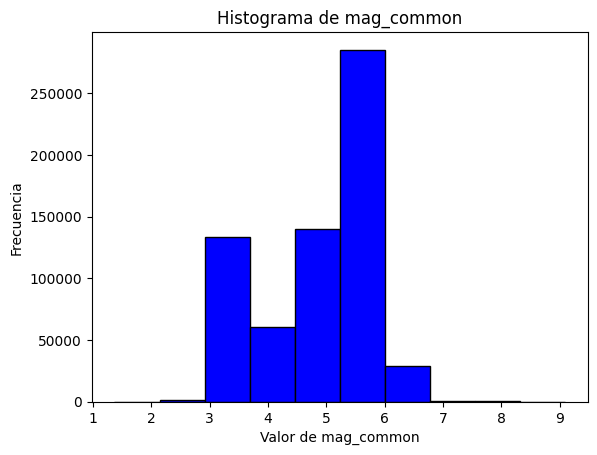

In [ ]:
# Crear un histograma
plt.hist(mag_common, bins=10, color='blue', edgecolor='black')

# Agregar etiquetas y título
plt.xlabel('Valor de mag_common')
plt.ylabel('Frecuencia')
plt.title('Histograma de mag_common')

# Mostrar el histograma
plt.show()

Veamos los valores máximos y mínimos de max_common para comprobar que no toma valores inesperados:

In [ ]:
print(max(mag_common), max(df["mag"]))
print(min(mag_common), min(df["mag"]))
print(len(mag_common))
print(len(df_terremotos))

9.1 9.1
1.37 0.7
650465
650465


In [ ]:
# Contar los valores NaN o NaT en mag_common
num_nan_or_nat = sum(x is None for x in mag_common)

# Mostrar el resultado
print(f"Número de registros NaN o NaT en mag_common: {num_nan_or_nat}")

Número de registros NaN o NaT en mag_common: 0


In [ ]:
# Crear la nueva columna 'mag_common' en df_terremotos
df_terremotos.insert(df_terremotos.columns.get_loc("magError") + 1, 'mag_common', mag_common)

# Mostrar las primeras filas del DataFrame actualizado
df_terremotos.head()

,time.1,time.2,latitude,longitude,depth,depthError,mag,magType,magError,mag_common,place
0,1998-01-23,01:02:56,40.352,29.269,10.0,NaN,2.5,md,NaN,4.675,"10 km SE of Umurbey, Turkey"
1,1998-01-23,02:53:14,51.296,-178.152,33.0,NaN,4.9,mb,NaN,6.022,"123 km WSW of Adak, Alaska"
2,1998-01-23,02:59:26,-25.072,70.007,10.0,NaN,4.1,mb,NaN,5.238,Mid-Indian Ridge
3,1998-01-23,04:51:35,44.344,149.791,33.0,NaN,3.7,mb,NaN,4.846,"180 km ESE of Kuril’sk, Russia"
4,1998-01-23,05:12:28,14.484,146.986,33.0,NaN,4.1,mb,NaN,5.238,"155 km ESE of Saipan, Northern Mariana Islands"


Por curiosidad, veamos qué terremotos tienen magnitud mayor que 9

In [ ]:
df_terremotos[df_terremotos['mag_common']>9]

,time.1,time.2,latitude,longitude,depth,depthError,mag,magType,magError,mag_common,place
151686,2004-12-26,01:58:53,3.295,95.982,30.0,NaN,9.1,mw,NaN,9.1,2004 Sumatra - Andaman Islands Earthquake
325114,2011-03-11,06:46:24,38.297,142.373,29.0,NaN,9.1,mww,NaN,9.1,"2011 Great Tohoku Earthquake, Japan"


# Tratamiento del Tiempo

A fin de poder agrupar posteriormente la cantidad de terremotos según la hora en la que sucedió, nos interesará crear variables que identifiquen cada registro según la hora total en la que ocurrió (desde el primer día registrado en el dataset hasta el último).

In [ ]:
# Mostrar los tipos de columnas y registros

print("\nTipología:\n\n", df_terremotos.dtypes, "\n")
print("Número de registros:", len(df_terremotos))


Tipología:

 time.1        datetime64[ns]
time.2                object
latitude             float64
longitude            float64
depth                float64
depthError           float64
mag                  float64
magType               object
magError             float64
mag_common           float64
place                 object
dtype: object 

Número de registros: 650465


Creamos la variable **hora** que nos dará información de la hora del día a la que ocurre el terremoto (UCT).

In [ ]:
# Convertir el campo "time.2" a tipo datetime con un formato específico
df_terremotos['time.2'] = pd.to_datetime(df_terremotos['time.2'], format='%H:%M:%S', errors='coerce')

# Extraer la hora y almacenarla en una nueva columna "hora"
df_terremotos['hora'] = df_terremotos['time.2'].dt.hour

# Reorganizar las columnas para colocar "hora" después de "time.2"
column_order = ['time.1', 'time.2', 'hora', 'latitude', 'longitude', 'depth', 'depthError', 'mag', 'magType', 'magError', 'mag_common', 'place']
df_terremotos = df_terremotos[column_order]

# Mostrar las primeras filas del DataFrame actualizado
df_terremotos.head()

,time.1,time.2,hora,latitude,longitude,depth,depthError,mag,magType,magError,mag_common,place
0,1998-01-23,1900-01-01 01:02:56,1,40.352,29.269,10.0,NaN,2.5,md,NaN,4.675,"10 km SE of Umurbey, Turkey"
1,1998-01-23,1900-01-01 02:53:14,2,51.296,-178.152,33.0,NaN,4.9,mb,NaN,6.022,"123 km WSW of Adak, Alaska"
2,1998-01-23,1900-01-01 02:59:26,2,-25.072,70.007,10.0,NaN,4.1,mb,NaN,5.238,Mid-Indian Ridge
3,1998-01-23,1900-01-01 04:51:35,4,44.344,149.791,33.0,NaN,3.7,mb,NaN,4.846,"180 km ESE of Kuril’sk, Russia"
4,1998-01-23,1900-01-01 05:12:28,5,14.484,146.986,33.0,NaN,4.1,mb,NaN,5.238,"155 km ESE of Saipan, Northern Mariana Islands"


In [ ]:
df_terremotos.tail()

,time.1,time.2,hora,latitude,longitude,depth,depthError,mag,magType,magError,mag_common,place
664934,2023-09-30,1900-01-01 22:24:00,22,-4.0308,141.4765,92.303,8.781,4.1,mb,0.185,5.238,"138 km SW of Aitape, Papua New Guinea"
664935,2023-09-30,1900-01-01 22:36:40,22,-9.0631,158.2800,10.000,1.824,4.6,mb,0.105,5.728,"172 km WNW of Malango, Solomon Islands"
664936,2023-09-30,1900-01-01 22:56:36,22,-8.6239,114.5620,112.987,5.339,4.4,mb,0.130,5.532,"30 km SSW of Negara, Indonesia"
664937,2023-09-30,1900-01-01 23:28:39,23,-20.6116,-67.9427,170.990,4.874,4.4,mb,0.240,5.532,"75 km NNE of Ollagüe, Chile"
664938,2023-09-30,1900-01-01 23:30:08,23,42.1062,77.1640,10.000,1.960,4.1,mb,0.213,5.238,Kyrgyzstan


In [ ]:
# Contar los valores NaN o NaT en la columna 'time.2'
num_nan_or_nat = df_terremotos['hora'].isna().sum()

# Mostrar el resultado
print(f"Número de registros NaN o NaT en 'time.2': {num_nan_or_nat}")

Número de registros NaN o NaT en 'time.2': 0


In [ ]:
df_terremotos = df_terremotos[['time.1', 'hora', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'mag_common', 'place']]

In [ ]:
df_terremotos.tail()

,time.1,hora,latitude,longitude,depth,mag,magType,mag_common,place
664934,2023-09-30,22,-4.0308,141.4765,92.303,4.1,mb,5.238,"138 km SW of Aitape, Papua New Guinea"
664935,2023-09-30,22,-9.0631,158.2800,10.000,4.6,mb,5.728,"172 km WNW of Malango, Solomon Islands"
664936,2023-09-30,22,-8.6239,114.5620,112.987,4.4,mb,5.532,"30 km SSW of Negara, Indonesia"
664937,2023-09-30,23,-20.6116,-67.9427,170.990,4.4,mb,5.532,"75 km NNE of Ollagüe, Chile"
664938,2023-09-30,23,42.1062,77.1640,10.000,4.1,mb,5.238,Kyrgyzstan


In [ ]:
# Convertir la columna "date.1" a tipo datetime, si aún no lo está
df_terremotos['time.3'] = pd.to_datetime(df_terremotos['time.1'], errors='coerce')

# Crear una nueva variable "dia_anual" para indicar el día del año (de 1 a 366)
df_terremotos['dia_anual'] = df_terremotos['time.3'].dt.dayofyear

# Reorganizar las columnas para colocar "hora" después de "time.1"
column_order = ['time.1', 'dia_anual', 'hora', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'mag_common', 'place']
df_terremotos = df_terremotos[column_order]

# Mostrar las primeras filas del DataFrame actualizado
df_terremotos.head()

,time.1,dia_anual,hora,latitude,longitude,depth,mag,magType,mag_common,place
0,1998-01-23,23,1,40.352,29.269,10.0,2.5,md,4.675,"10 km SE of Umurbey, Turkey"
1,1998-01-23,23,2,51.296,-178.152,33.0,4.9,mb,6.022,"123 km WSW of Adak, Alaska"
2,1998-01-23,23,2,-25.072,70.007,10.0,4.1,mb,5.238,Mid-Indian Ridge
3,1998-01-23,23,4,44.344,149.791,33.0,3.7,mb,4.846,"180 km ESE of Kuril’sk, Russia"
4,1998-01-23,23,5,14.484,146.986,33.0,4.1,mb,5.238,"155 km ESE of Saipan, Northern Mariana Islands"


In [ ]:
# Mostrar las últimas filas del DataFrame actualizado
df_terremotos.tail()

,time.1,dia_anual,hora,latitude,longitude,depth,mag,magType,mag_common,place
664934,2023-09-30,273,22,-4.0308,141.4765,92.303,4.1,mb,5.238,"138 km SW of Aitape, Papua New Guinea"
664935,2023-09-30,273,22,-9.0631,158.2800,10.000,4.6,mb,5.728,"172 km WNW of Malango, Solomon Islands"
664936,2023-09-30,273,22,-8.6239,114.5620,112.987,4.4,mb,5.532,"30 km SSW of Negara, Indonesia"
664937,2023-09-30,273,23,-20.6116,-67.9427,170.990,4.4,mb,5.532,"75 km NNE of Ollagüe, Chile"
664938,2023-09-30,273,23,42.1062,77.1640,10.000,4.1,mb,5.238,Kyrgyzstan


In [ ]:
print("NÚMERO TOTAL DE DÍAS:", len(set(list(df_terremotos["time.1"]))) )

NÚMERO TOTAL DE DÍAS: 9382


In [ ]:
# Contar los valores NaN o NaT en la columna 'hora'
num_nan_or_nat = df_terremotos['hora'].isna().sum()
num_nan_or_nat_2 = df_terremotos['dia_anual'].isna().sum()


# Mostrar el resultado
print(f"Número de registros NaN o NaT en 'hora': {num_nan_or_nat}")
print(f"Número de registros NaN o NaT en 'dia_anual': {num_nan_or_nat_2}")

Número de registros NaN o NaT en 'hora': 0
Número de registros NaN o NaT en 'dia_anual': 0


In [ ]:
# Crear una nueva variable "dia_total" que representa el número total de días
df_terremotos['dia_total'] = (df_terremotos['time.1'] - df_terremotos['time.1'].min()).dt.days + 1

df_terremotos = df_terremotos[['time.1', 'dia_total', 'dia_anual', 'hora', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'mag_common', 'place']]

df_terremotos.head(10)

,time.1,dia_total,dia_anual,hora,latitude,longitude,depth,mag,magType,mag_common,place
0,1998-01-23,1,23,1,40.352000,29.269000,10.000,2.5,md,4.675,"10 km SE of Umurbey, Turkey"
1,1998-01-23,1,23,2,51.296000,-178.152000,33.000,4.9,mb,6.022,"123 km WSW of Adak, Alaska"
2,1998-01-23,1,23,2,-25.072000,70.007000,10.000,4.1,mb,5.238,Mid-Indian Ridge
3,1998-01-23,1,23,4,44.344000,149.791000,33.000,3.7,mb,4.846,"180 km ESE of Kuril’sk, Russia"
4,1998-01-23,1,23,5,14.484000,146.986000,33.000,4.1,mb,5.238,"155 km ESE of Saipan, Northern Mariana Islands"
5,1998-01-23,1,23,5,-16.863000,-173.169000,33.000,4.1,mb,5.238,"120 km SE of Hihifo, Tonga"
6,1998-01-23,1,23,6,-31.885000,-71.973000,22.300,4.0,md,5.680,"81 km WSW of Illapel, Chile"
7,1998-01-23,1,23,6,-31.890000,-71.955000,26.900,4.1,md,5.747,"79 km WSW of Illapel, Chile"
8,1998-01-23,1,23,6,-21.759000,-176.575000,100.000,4.4,mb,5.532,"156 km WSW of Haveluloto, Tonga"
9,1998-01-23,1,23,6,19.418667,-155.273167,9.743,2.7,md,4.809,"4 km WSW of Volcano, Hawaii"


Creamos la variable **hora_total**, que cobrará una **gran relevancia** a lo largo de todo el proyecto pues nos permitirá agrupar los terremotos que ocurren a una determinada hora a lo largo de toda la línea temporal y compararlos con las variables solares siguiendo el mismo criterio.

Dicho de otro modo, actuará como nuestra timestamp y cada registro representará un valor de hora_total más cuando fusionemos los datos de los terremotos con los del sol.

In [ ]:
df_terremotos['hora_total'] = df_terremotos['hora'] + (df_terremotos['dia_total'] - 1)*24

df_terremotos = df_terremotos[['time.1', 'dia_total', 'dia_anual', 'hora', 'hora_total','latitude', 'longitude', 'depth', 'mag', 'magType', 'mag_common', 'place']]

df_terremotos.head(10)

,time.1,dia_total,dia_anual,hora,hora_total,latitude,longitude,depth,mag,magType,mag_common,place
0,1998-01-23,1,23,1,1,40.352000,29.269000,10.000,2.5,md,4.675,"10 km SE of Umurbey, Turkey"
1,1998-01-23,1,23,2,2,51.296000,-178.152000,33.000,4.9,mb,6.022,"123 km WSW of Adak, Alaska"
2,1998-01-23,1,23,2,2,-25.072000,70.007000,10.000,4.1,mb,5.238,Mid-Indian Ridge
3,1998-01-23,1,23,4,4,44.344000,149.791000,33.000,3.7,mb,4.846,"180 km ESE of Kuril’sk, Russia"
4,1998-01-23,1,23,5,5,14.484000,146.986000,33.000,4.1,mb,5.238,"155 km ESE of Saipan, Northern Mariana Islands"
5,1998-01-23,1,23,5,5,-16.863000,-173.169000,33.000,4.1,mb,5.238,"120 km SE of Hihifo, Tonga"
6,1998-01-23,1,23,6,6,-31.885000,-71.973000,22.300,4.0,md,5.680,"81 km WSW of Illapel, Chile"
7,1998-01-23,1,23,6,6,-31.890000,-71.955000,26.900,4.1,md,5.747,"79 km WSW of Illapel, Chile"
8,1998-01-23,1,23,6,6,-21.759000,-176.575000,100.000,4.4,mb,5.532,"156 km WSW of Haveluloto, Tonga"
9,1998-01-23,1,23,6,6,19.418667,-155.273167,9.743,2.7,md,4.809,"4 km WSW of Volcano, Hawaii"


# Guardamos el dataframe pre-procesado terremotos_1.xlsx

In [ ]:
df_terremotos.to_excel(path+'/dataframes_preprocesados/terremotos_1.xlsx', index=False)